# Select labels using machine learning
[apoc](https://github.com/haesleinhuepf/apoc) allows selecting labeled objects according to properties such as size, shape and intensity in a corresponding image. In this example, we will select elongated objects from an instance segmentation of blobs.

In [1]:
import apoc

from skimage.io import imread
import pyclesperanto_prototype as cle
import numpy as np

cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
image = imread('../../data/blobs.tif')
labels = cle.label(cle.threshold_otsu(image))
annotation = imread('../../data/label_annotation.tif')

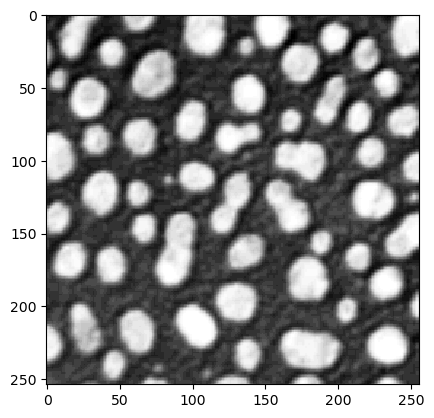

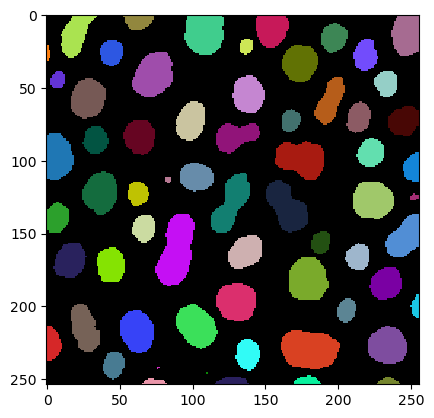

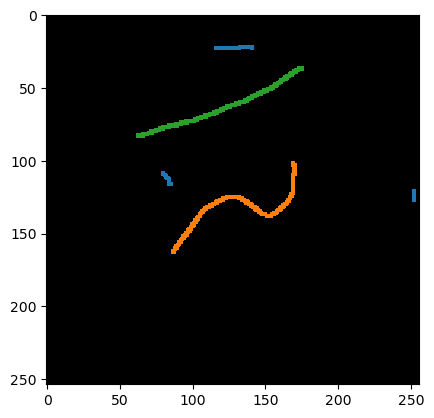

In [3]:
cle.imshow(image)
cle.imshow(labels, labels=True)
cle.imshow(annotation, labels=True)

## Training
For training the classifier, you need to specify features. In the following we use mean and standard deviation intensity within the labeled objects and the object size and shape.

In [4]:
features = 'area,mean_max_distance_to_centroid_ratio,standard_deviation_intensity'

cl_filename = "object_selector.cl"

# Create an object classifier
apoc.erase_classifier(cl_filename) # delete it if it was existing before
classifier = apoc.ObjectSelector(cl_filename, positive_class_identifier=1)

# train it
classifier.train(features, labels, annotation, image)

## Prediction
After the classifier was trained, we can use it to select objects.

23.0


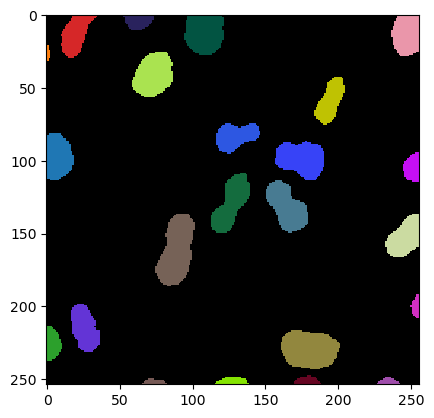

In [5]:
result = classifier.predict(labels, image)

print(result.max())

cle.imshow(result, labels=True)

One can also load the classifier from disc and apply it to another dataset. We demonstrate that by applying the classifier to a rotated version of the image and label image from above.

23.0


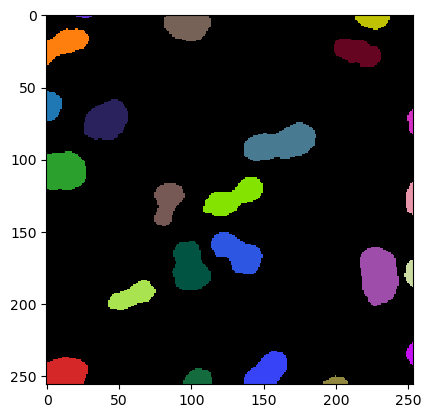

In [6]:
image1 = image.T
labels1 = cle.label(cle.threshold_otsu(image1))

classifier = apoc.ObjectSelector(cl_filename)

result = classifier.predict(labels1, image1)

print(result.max())

cle.imshow(result, labels=True)

After training, we can ask the classifier how important features were while doing the prediction.

In [7]:
classifier.feature_importances()

{'area': 0.29573084473661354,
 'mean_max_distance_to_centroid_ratio': 0.4264564597125618,
 'standard_deviation_intensity': 0.27781269555082466}

# Exercise
Use the code and example images above to train a classifier that selects all small objects in the label image.